# 2.Importing Required Libraries

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score


from sklearn.preprocessing import MinMaxScaler


from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

pd.set_option('display.float_format', lambda x: '%.5f' % x)

# 4.Observing Data

In [3]:
data = pd.read_csv('Melbourne_housing_FULL.csv')
df = data.copy()


In [4]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
df.shape

(34857, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [7]:
df.memory_usage()

Index               132
Suburb           278856
Address          278856
Rooms            278856
Type             278856
Price            278856
Method           278856
SellerG          278856
Date             278856
Distance         278856
Postcode         278856
Bedroom2         278856
Bathroom         278856
Car              278856
Landsize         278856
BuildingArea     278856
YearBuilt        278856
CouncilArea      278856
Lattitude        278856
Longtitude       278856
Regionname       278856
Propertycount    278856
dtype: int64

# 5.Exploratory Data Analysis

In [ ]:
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]

num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int", "float"]]

cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]

cat_cols = cat_cols + num_but_cat

cat_cols = [col for col in cat_cols if col not in cat_but_car]

In [21]:
columns_to_convert = df.select_dtypes(include=['object']).columns

df[columns_to_convert] = df[columns_to_convert].astype('category')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         34857 non-null  category
 1   Address        34857 non-null  category
 2   Rooms          34857 non-null  int64   
 3   Type           34857 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         34857 non-null  category
 6   SellerG        34857 non-null  category
 7   Date           34857 non-null  category
 8   Distance       34856 non-null  float64 
 9   Postcode       34856 non-null  float64 
 10  Bedroom2       26640 non-null  float64 
 11  Bathroom       26631 non-null  float64 
 12  Car            26129 non-null  float64 
 13  Landsize       23047 non-null  float64 
 14  BuildingArea   13742 non-null  float64 
 15  YearBuilt      15551 non-null  float64 
 16  CouncilArea    34854 non-null  category
 17  Lattitude      26881 non-null  

In [26]:
df[df.duplicated()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


In [25]:
df.drop_duplicates(inplace=True)

In [30]:
df.dropna(inplace=True)

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,8887.00000,3.09891,0.96379,1.00000,2.00000,3.00000,4.00000,12.00000
Price,8887.00000,1092901.62890,679381.90411,131000.00000,641000.00000,900000.00000,1345000.00000,9000000.00000
Distance,8887.00000,11.19989,6.81340,0.00000,6.40000,10.20000,13.90000,47.40000
Postcode,8887.00000,3111.66265,112.61427,3000.00000,3044.00000,3084.00000,3150.00000,3977.00000
Bedroom2,8887.00000,3.07820,0.96627,0.00000,2.00000,3.00000,4.00000,12.00000
Bathroom,8887.00000,1.64645,0.72161,1.00000,1.00000,2.00000,2.00000,9.00000
Car,8887.00000,1.69225,0.97546,0.00000,1.00000,2.00000,2.00000,10.00000
Landsize,8887.00000,523.48036,1061.32423,0.00000,212.00000,478.00000,652.00000,42800.00000
BuildingArea,8887.00000,149.30948,87.92558,0.00000,100.00000,132.00000,180.00000,3112.00000
YearBuilt,8887.00000,1965.75335,37.04088,1196.00000,1945.00000,1970.00000,2000.00000,2019.00000


## Data Visualization

<Axes: xlabel='Price', ylabel='Count'>

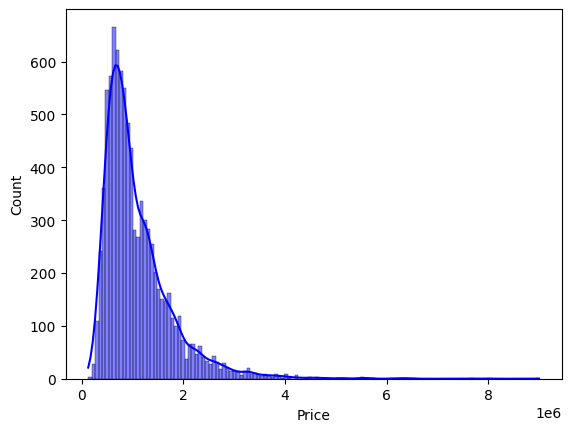

In [36]:
sns.histplot(data=df["Price"], kde=True, color="blue" )

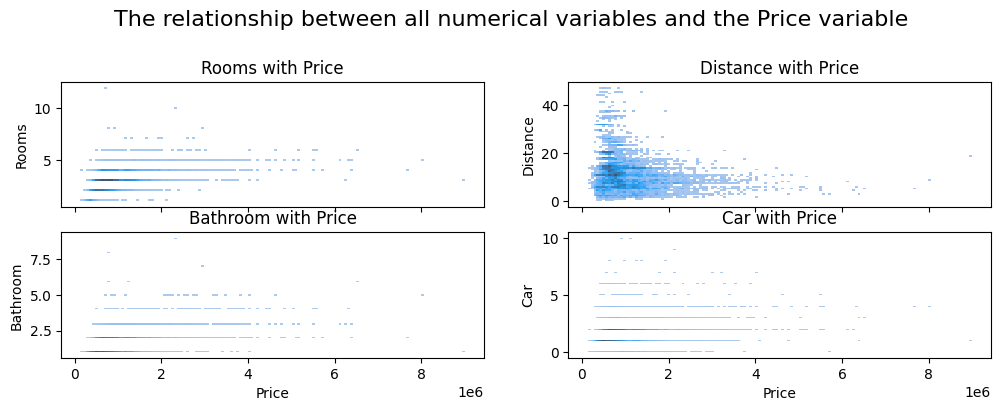

In [37]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(12,4))
plt.subplots_adjust(top=0.80)
fig.suptitle('The relationship between all numerical variables and the Price variable', fontsize=16)
axes[0,0].set_title('Rooms with Price')
sns.histplot(ax=axes[0,0], data=df, x="Price", y="Rooms")

axes[0,1].set_title('Distance with Price')
sns.histplot(ax=axes[0,1], data=df, x="Price", y="Distance")

axes[1,0].set_title('Bathroom with Price')
sns.histplot(ax=axes[1,0], data=df, x="Price", y="Bathroom")

axes[1,1].set_title('Car with Price')
sns.histplot(ax=axes[1,1], data=df, x="Price", y="Car")
plt.savefig('relationship_with_price.png')

<Axes: >

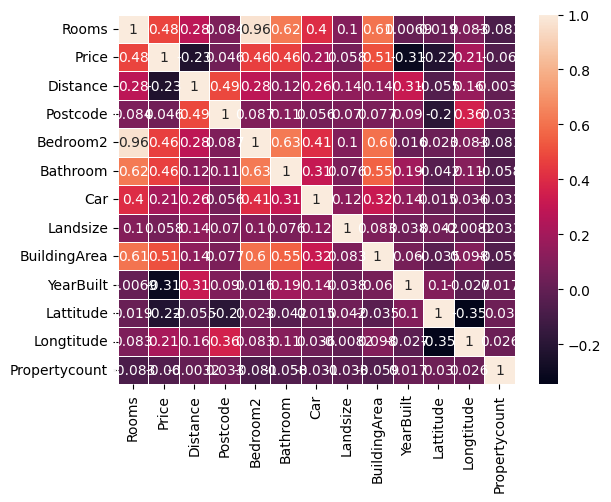

In [49]:
sns.heatmap(df.corr(numeric_only=True).T, annot=True, linewidths=0.5)

## Label Encoding

In [50]:
transformed_df=df.copy()
categorical_columns = df.select_dtypes(include="category").columns

le = LabelEncoder()

for i in categorical_columns:
    transformed_df[i]=le.fit_transform(transformed_df[i])

In [51]:
transformed_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,0,3922,2,0,1035000.00000,1,22,62,2.50000,3067.00000,...,1.00000,0.00000,156.00000,79.00000,1900.00000,31,-37.80790,144.99340,2,4019.00000
4,0,6458,3,0,1465000.00000,3,22,63,2.50000,3067.00000,...,2.00000,0.00000,134.00000,150.00000,1900.00000,31,-37.80930,144.99440,2,4019.00000
6,0,6960,4,0,1600000.00000,4,147,64,2.50000,3067.00000,...,1.00000,2.00000,120.00000,142.00000,2014.00000,31,-37.80720,144.99410,2,4019.00000
11,0,1374,3,0,1876000.00000,1,147,69,2.50000,3067.00000,...,2.00000,0.00000,245.00000,210.00000,1910.00000,31,-37.80240,144.99930,2,4019.00000
14,0,8740,2,0,1636000.00000,1,147,74,2.50000,3067.00000,...,1.00000,2.00000,256.00000,107.00000,1890.00000,31,-37.80600,144.99540,2,4019.00000


In [52]:
X = transformed_df.drop(['Price'], axis = 1)
y = df['Price']

In [53]:
X_train, X_test,y_train, y_test =train_test_split(X,y, test_size=0.2)

In [54]:
scaler = MinMaxScaler()

scaled_training_df = scaler.fit_transform(X_train)

scaled_test_df=scaler.transform(X_test)

# 6.Model Selection

In [55]:
def select_best_model(models, X, y, cv=10, scoring='neg_mean_squared_error'):
    """
    Selects the best model among a list of models using cross-validation and returns a DataFrame with model names and scores.
    
    Parameters:
    - models (dict): A dictionary of model names as keys and model objects as values.
    - X (array-like): The feature matrix.
    - y (array-like): The target variable.
    - cv (int, optional): Number of cross-validation folds (default is 5).
    - scoring (str, optional): Scoring metric for cross-validation (default is 'neg_mean_squared_error').
    
    Returns:
    - results_df (DataFrame): A DataFrame with two columns - 'Model' and 'RMSE Score'.
    """
    model_names = []
    rmse_scores = []
    
    for model_name, model in models.items():
        # Perform cross-validation
        cv_scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
        rmse_score = np.mean(np.sqrt(np.abs(cv_scores)))
        
        # Append the model name and its scores to the lists
        model_names.append(model_name)
        rmse_scores.append(rmse_score)
    
    # Create a DataFrame from the lists
    results_df = pd.DataFrame({'Model': model_names, 'RMSE Score': rmse_scores})
    
    return results_df

In [56]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet': ElasticNet(),
    'SVR': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(),
}

results_df = select_best_model(models, X_train, y_train)

print("Model Comparison Results:")
print(results_df)

## Hyper-parameter Optimization

In [ ]:
gb_reg = GradientBoostingRegressor()

param_grid = {
    'n_estimators': [10, 20, 30, 40, 50, 60, 100, 200],
    'max_depth': [3, 4, 5], 
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'subsample': [0.5, 0.7, 1.0]
}

grid_search = GridSearchCV(estimator=gb_reg, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5)

grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)
print("Best RMSE Score:", np.sqrt(-grid_search.best_score_))

In [ ]:
selected_model = GradientBoostingRegressor(n_estimators=200, max_depth=5, 
                                           learning_rate=0.1, subsample=1)
final_model = selected_model.fit(X_train,y_train)
final_model_pred = final_model.predict(X_test)
print(math.sqrt(mean_squared_error(y_test, final_model_pred)))

# 7.Model Evaluation

In [ ]:
print("Final Model Mean Squared Error", mean_squared_error(y_test, final_model_pred))
print("Final Model Root Mean Squared Error", math.sqrt(mean_squared_error(y_test, final_model_pred)))
print("Final Model Mean Absolute Error", mean_absolute_error(y_test, final_model_pred))
print("Final Model R2 Score", r2_score(y_test, final_model_pred))